In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from utilsforecast.plotting import plot_series 
from coreforecast.scalers import boxcox, boxcox_lambda
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import STL, MSTL
from statsforecast import StatsForecast

warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(f'../DATA/aus_retail.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.head()

,State,Industry,Series ID,Month,Turnover
0,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-04-01,4.4
1,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-05-01,3.4
2,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-06-01,3.6
3,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-07-01,4.0
4,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-08-01,3.6


In [4]:
np.random.seed(84564)
random_series_id = np.random.choice(df['Series ID'].unique(), 1)[0]
surprise = df[df['Series ID'] == random_series_id]
surprise['Month_2'] = surprise['Month']
surprise = surprise.set_index('Month')

In [5]:
surprise

,State,Industry,Series ID,Turnover,Month_2
Month,,,,,
1982-04-01,Australian Capital Territory,"Cafes, restaurants and takeaway food services",A3349606J,7.6,1982-04-01
1982-05-01,Australian Capital Territory,"Cafes, restaurants and takeaway food services",A3349606J,6.7,1982-05-01
1982-06-01,Australian Capital Territory,"Cafes, restaurants and takeaway food services",A3349606J,7.1,1982-06-01
1982-07-01,Australian Capital Territory,"Cafes, restaurants and takeaway food services",A3349606J,7.5,1982-07-01
1982-08-01,Australian Capital Territory,"Cafes, restaurants and takeaway food services",A3349606J,7.3,1982-08-01
...,...,...,...,...,...
2018-08-01,Australian Capital Territory,"Cafes, restaurants and takeaway food services",A3349606J,69.2,2018-08-01
2018-09-01,Australian Capital Territory,"Cafes, restaurants and takeaway food services",A3349606J,68.6,2018-09-01
2018-10-01,Australian Capital Territory,"Cafes, restaurants and takeaway food services",A3349606J,70.2,2018-10-01


<Axes: xlabel='Month', ylabel='Turnover'>

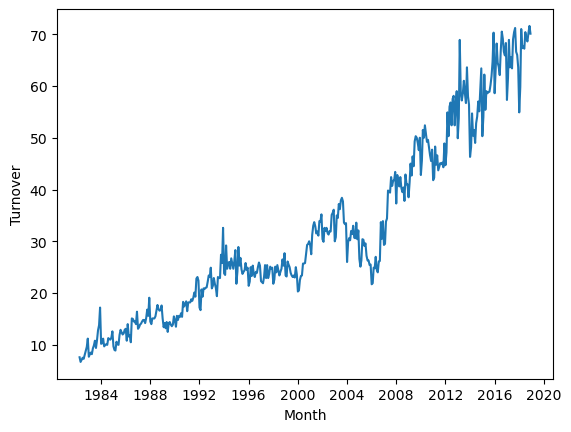

In [6]:
sns.lineplot(surprise["Turnover"])

<Axes: xlabel='Month', ylabel='resid'>

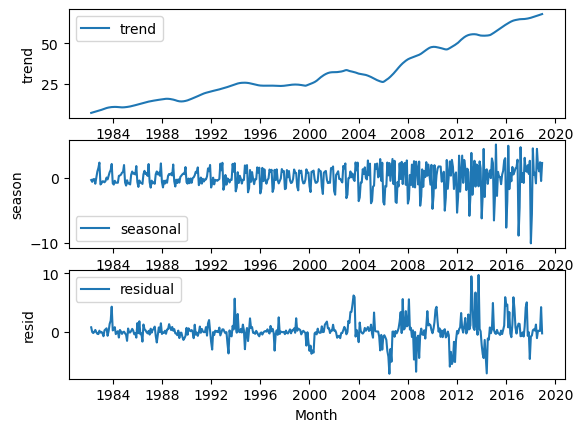

In [7]:
stl = STL(surprise["Turnover"], period=12, robust=True)
res_stl = stl.fit()
fig, axes = plt.subplots(3,1)
sns.lineplot(res_stl.trend, label = "trend", ax=axes[0])
sns.lineplot(res_stl.seasonal, label = "seasonal", ax=axes[1])
sns.lineplot(res_stl.resid, label = "residual", ax=axes[2])

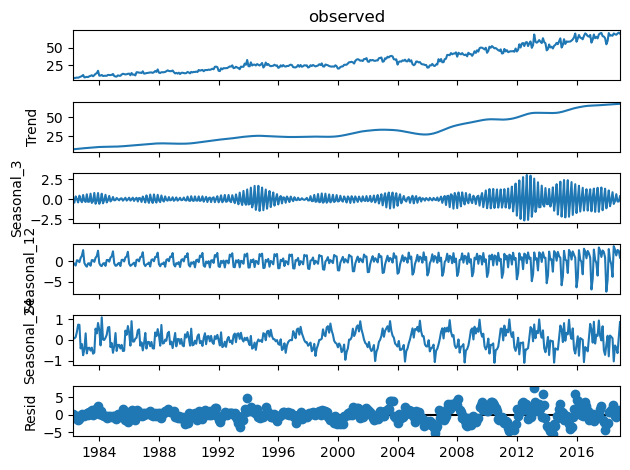

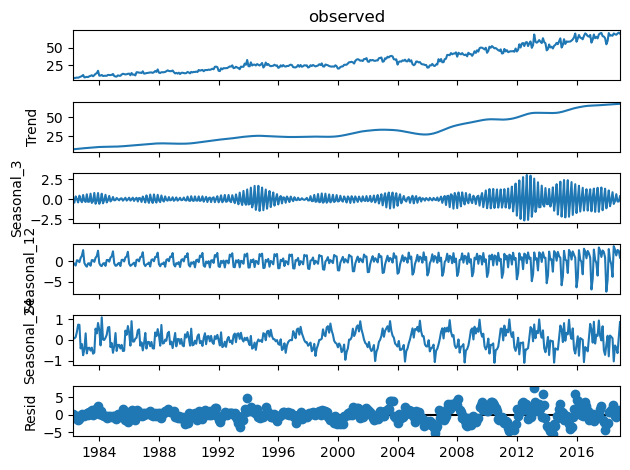

In [25]:
mstl = MSTL(surprise["Turnover"], periods=(24, 12, 3))
res_mstl = mstl.fit()

res_mstl.plot()

-0.8999350594958863


<Axes: xlabel='Month_2'>

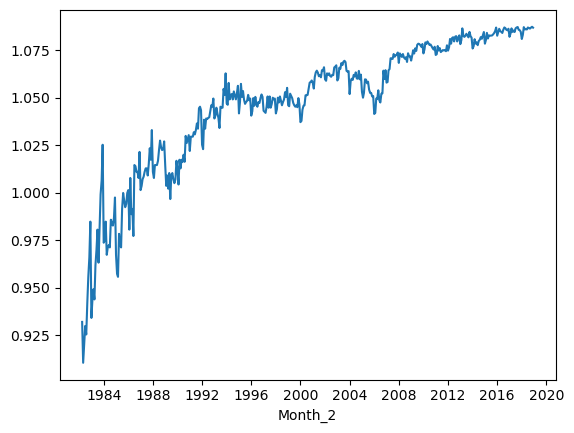

In [21]:
optim_lambda = boxcox_lambda(surprise["Turnover"].to_numpy(), method="guerrero", season_length=4)
print(optim_lambda)
y_transformed = boxcox(surprise["Turnover"].to_numpy(), optim_lambda)
sns.lineplot(surprise, x='Month_2', y=y_transformed)

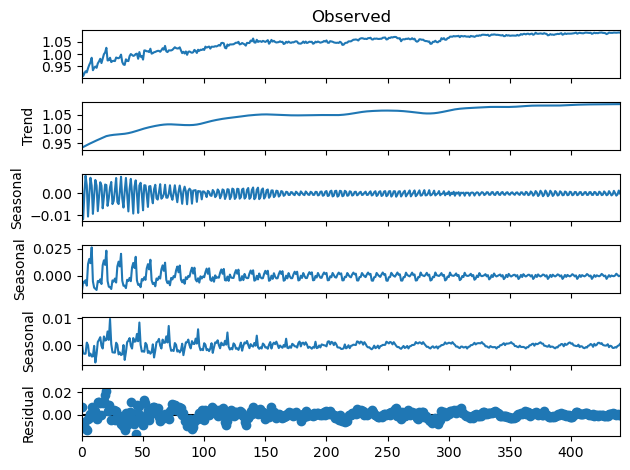

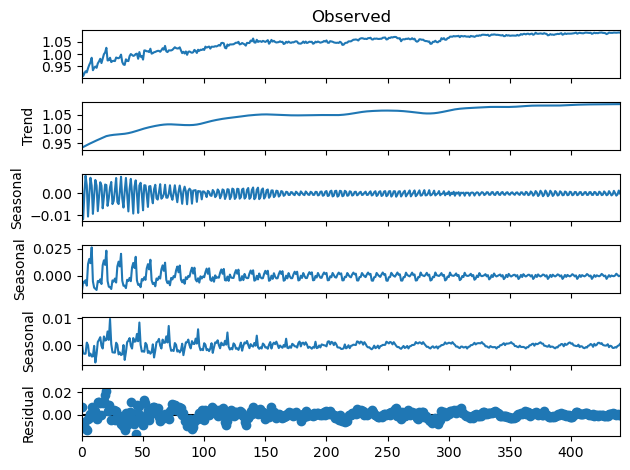

In [22]:
mstl = MSTL(y_transformed, periods=(24, 12, 4))
res_mstl = mstl.fit()

res_mstl.plot()

<Axes: xlabel='Month_2', ylabel='Turnover'>

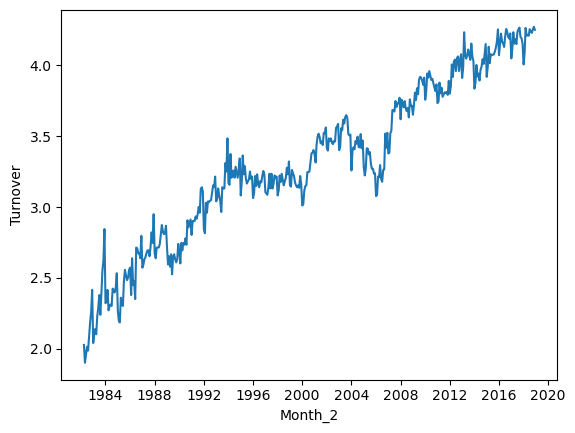

In [23]:
y_transformed = np.log(surprise["Turnover"])
sns.lineplot(surprise, x='Month_2', y=y_transformed)

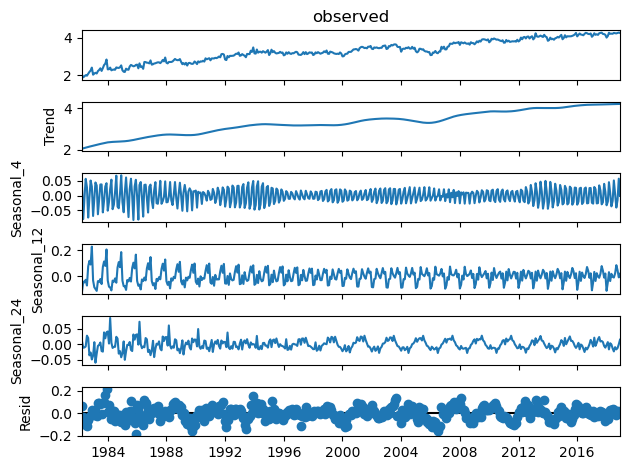

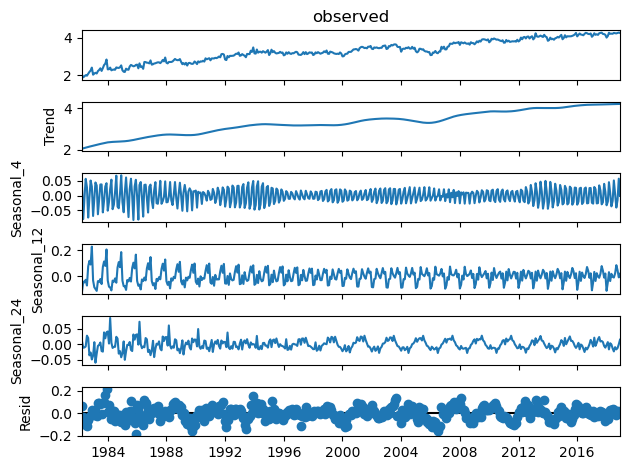

In [24]:
mstl = MSTL(y_transformed, periods=(24, 12, 4))
res_mstl = mstl.fit()

res_mstl.plot()